0.719970093513
0.845318901453


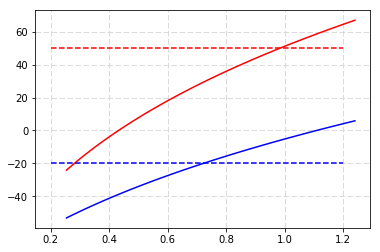

In [47]:
 # coding:utf-8
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

ABS_ZERO = -273.15

def calcAlEp(param,temp):
    A1 = param["Ato"]*param["Stv"]*temp**4.0
    A2 = param["Ff"]*param["Ae"]*param["Pe"]
    B1 = param["As"]*param["Ps"]
    B2 = param["Ff"]*param["Ae"]*param["Pa"]
    alep = (A1 - A2) / (param["Lr"] * (B1 + B2))
    return alep

def calcTemperature(param,alep):
    B1 = param["As"]*param["Ps"]
    B2 = param["Ff"]*param["Ae"]*param["Pa"]
    A2 = param["Ff"]*param["Ae"]*param["Pe"]
    Temp4 = (alep * param["Lr"] * (B1 + B2) + A2)/(param["Ato"]*param["Stv"])
    Temp = Temp4 **0.25
    return Temp


# 形態係数 F は人工衛星が地球と比較し、十分に小さいため球体間における形態係数とする。
def calcFormFactor(R,H):
    Atmp = R**2.0
    Btmp = (R + H)**2.0
    Ff = 0.5 * (1.0-(1.0-Atmp/Btmp)**0.5)
    return Ff

def main():
    Rh = 6378.14 # 地球の半径[km]
    Hh = 400 # 高度[km]
    Ff = calcFormFactor(Rh,Hh)
    aleps = []
    lowTemps = []
    highTemps = []

    # 低温最悪条件
    lowparam ={
        "Ff" : Ff, #放射形態係数
        "As" : 0.01000, #衛星姿勢(太陽投影面積) [m^s]
        "Ps" : 1318, #太陽定数 Ps[W/m^2]
        "Pe" : 237, #地球赤外輻射 Pe[W/m^2]
        "Lr" : 0.61, #軌道1周あたりの日照量
        "Stv": 5.67*10**(-8), #ステファン・ボルツマン定数
        "Ato": 0.06000, #衛星の表面積
        "Ae" : 0.06000} #衛星の表面積と同じ値を使う
    lowparam["Pa"] = lowparam["Ps"]*0.3 #アルベド

    # 高温最悪条件
    hiparam ={
        "Ff" : Ff,
        "As" : 0.01732,
        "Ps" : 1414,
        "Pe" : 237,
        "Lr" : 1.00,
        "Stv": 5.67*10**(-8),
        "Ato": 0.06000,
        "Ae" : 0.06000}
    hiparam["Pa"] = hiparam["Ps"]*0.3

    for tidx in range(220,280,1):
        lowtemp = tidx
        alep = calcAlEp(lowparam,lowtemp)
        hitemp = calcTemperature(hiparam,alep)
        #print str(alep)+","+str(lowtemp)+","+str(hitemp)+\
        #    ","+str(lowtemp + ABS_ZERO)+","+str(hitemp + ABS_ZERO)
        aleps.append(alep)
        lowTemps.append(lowtemp + ABS_ZERO)
        highTemps.append(hitemp + ABS_ZERO)

#         print str(math.floor(hitemp))
        
#         if lowtemp == 253:
#             print str(alep)
#         if math.floor(hitemp) == 312.0:
#             print str(alep)
           

#     axes = plt.gca()
#     axes.set_xlim(0, 4)
#     axes.set_ylim(0, 3)
#     axes.set_xticklabels([])
#     axes.set_yticklabels([])
    plt.grid(which='major',color='lightgrey',linestyle='dashed')
    plt.grid(which='minor',color='black',linestyle='dashed')
    plt.plot(aleps, lowTemps, 'blue')
    plt.plot(aleps, highTemps, 'red')
    plt.plot([0.2, 1.2], [50, 50], 'red',linestyle='dashed')
    plt.plot([0.2, 1.2], [-20, -20], 'blue',linestyle='dashed')

if __name__ == '__main__':
    main()